## Lab Exam Solution, 2018 Semester 2

#### Name and Student Number: 

### Q1      

#### Q1(a)

In [1]:
A=zeros(8,8)

8×8 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [10]:
A[1,:]=[1 1 2 3 4 2 2 0]
A[2,1]=0.6
A[3,2]=0.7
A[4,3]=0.75
A[5,4]=0.75
A[6,5]=0.8
A[7,6]=0.65
A[8,7]=0.6;

#### Q1 (b)

In [12]:
eigvals(A)

8-element Array{Complex{Float64},1}:
       0.0+0.0im     
   1.83619+0.0im     
  0.318744+0.787004im
  0.318744-0.787004im
 -0.628993+0.375756im
 -0.628993-0.375756im
 -0.107848+0.578011im
 -0.107848-0.578011im

Largest real eigenvalue is $1.83619>1$. Therefore population will survive (increase).

#### Q1 (c)

In [15]:
# After harvesting, the Leslie matrix is
A1=A
A1[1,:]=[1 1 2 3 4 2 2 0]
A1[2,1]=0.35
A1[3,2]=0.4
A1[4,3]=0.45
A1[5,4]=0.75
A1[6,5]=0.8
A1[7,6]=0.65
A1[8,7]=0.0;
A1

8×8 Array{Float64,2}:
 1.0   1.0  2.0   3.0   4.0  2.0   2.0  0.0
 0.35  0.0  0.0   0.0   0.0  0.0   0.0  0.0
 0.0   0.4  0.0   0.0   0.0  0.0   0.0  0.0
 0.0   0.0  0.45  0.0   0.0  0.0   0.0  0.0
 0.0   0.0  0.0   0.75  0.0  0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.8  0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.65  0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0

In [16]:
eigvals(A1)

8-element Array{Complex{Float64},1}:
   1.47835+0.0im     
  0.354222+0.533388im
  0.354222-0.533388im
 -0.481187+0.284946im
 -0.481187-0.284946im
 -0.112208+0.496651im
 -0.112208-0.496651im
       0.0+0.0im     

Largest real eigenvalue is $1.47835>1$. Therefore population is sustainable.

### Q2

#### Q2 (a)

In [1]:
function f(x)
    x.^4-x.*(sin(x).^2+6)
end
function df(x)
    4*x.^3-(sin(x)+6)-x.*(2*sin(x).*cos(x))
end
function ddf(x)
    12*x.^2-cos(x)-(2*sin(x).*cos(x))-x.*(2*cos(x).^2-2*sin(x).^2) 
end

ddf (generic function with 1 method)

In [2]:
x0=-2
x=x0
for i in 1:10
    x=x-df(x)/ddf(x)
end
x

1.2441499235253068

In [3]:
df(x)

-1.7763568394002505e-15

In [ ]:
Critical point: x=1.2441499235253068

#### Q2 (b)

In [4]:
ddf(x)

19.622161224174675

### Q3

#### Q3 (a)

In [25]:
import QuadGK.quadgk
function ff(x)
    sqrt(x).*tan(x)
end
Area=quadgk(ff, 0, pi/4)

(0.2489370661703866, 1.9139623012019193e-9)

In [ ]:
The area is approximately 0.2489370661703866 square units.

#### Q3 (b)

In [26]:
sqrt(pi/4)*pi/4

0.6960409996039634

We see that on $[0, \pi/4]$, $\sqrt{x}\tan(x)\le 1$. So the area fall within the box $[0,\pi/4]\times[0,1]$.

In [36]:
iin=0
N=1000000
for i in 1:N
    x=rand(1,2).*[pi/4 1]
    if x[2]<=sqrt(x[1])*tan(x[1])
        iin=iin+1
    end
end
Area=(pi/4)*iin/N

0.2488510518779913

Thus, area$=0.2488510518779913$ squre units.

### Q4

In [1]:
using Plots

In [2]:
using DifferentialEquations

In [34]:
function ff(y,p,t) 
    exp(sin.(t)).*(sqrt.(t)-1)
end
y0=-2.0
trange=(0.0,8.0)
ProbQ4=ODEProblem(ff,y0,trange);  #Tsit5(),reltol=1e-8,abstol=1e-8

In [36]:
#sol_y=solve(Prob,Tsit5(),reltol=1.0e-8,abstol=1e-8);
soln_y=solve(ProbQ4,Tsit5(),reltol=1e-8,abstol=1e-8);

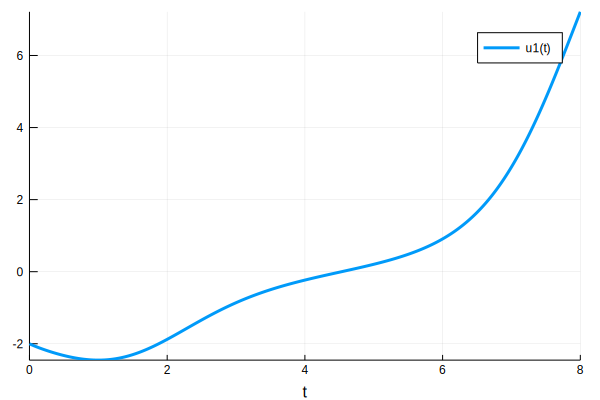

In [37]:
plot(soln_y)